# **COMPUTER VISION**

**UNIVERSIDAD MILITAR NUEVA GRANADA**

**Project 2**

FACING

Docente: Diego Renza Torres

Estudiante: Diana Tique - Santiago Téllez y Daniel Sánchez

In [ ]:
import tarfile
import matplotlib.pyplot as plt
import numpy as np
import time
import random

from keras_tuner import RandomSearch,Hyperband
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, BatchNormalization, Activation, MaxPooling2D

from sklearn.model_selection import train_test_split

In [ ]:
device_name = tf.test.gpu_device_name()

In [ ]:
print(device_name)

/device:GPU:0


In [ ]:
def plot_history(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Accuracy')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.grid(True)

In [ ]:
!unzip -qq /content/training_data.zip -d /content/

In [ ]:
path = path = 'Data'

In [ ]:
img_size = (128,128)
img_shape = (128,128,3)

In [ ]:
train = image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=60,
    image_size=img_size,
    color_mode = 'rgb',
    validation_split = 0.2,
    subset="training",
    seed = 456789
    )
validation = image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=60,
    image_size=img_size,
    color_mode = 'rgb',
    validation_split = 0.2,
    subset="validation",
    seed = 456789
    )
train = train.map(lambda x, y: (tf.divide(x, 255), y))
validation = validation.map(lambda x, y: (tf.divide(x, 255), y))
label_names = ["Mandarina","Manzana"]


Found 106 files belonging to 2 classes.
Using 85 files for training.
Found 106 files belonging to 2 classes.
Using 21 files for validation.


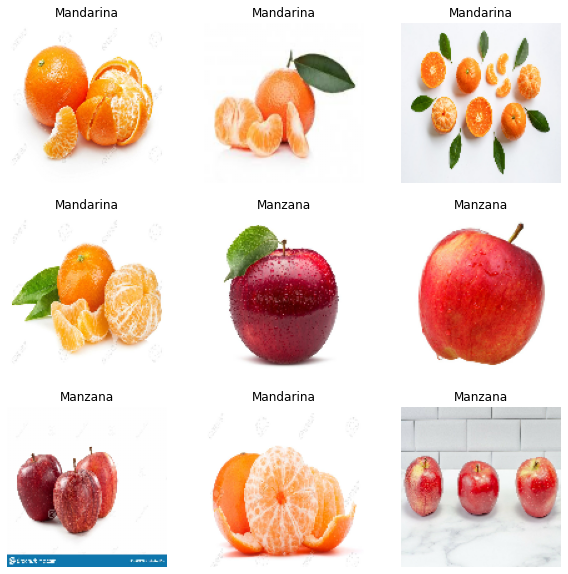

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze())
        result = np.where(labels[i].numpy() == 1)
        plt.title(label_names[int(result[0])])
        plt.axis("off")

# Modelo inicial

In [ ]:
model_1 = keras.Sequential()
# CONV > CONV > BN > RELU > MAXPOOLING
model_1.add(Conv2D(64, (3, 3), (1, 1), padding='valid', input_shape=img_shape))
model_1.add(Conv2D(64, (3, 3), (1, 1), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D((2, 2), (2, 2), padding='valid'))
# CONV > CONV > BN > RELU > MAXPOOLING
model_1.add(Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=img_shape))
model_1.add(Conv2D(32, (3, 3), (1, 1), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D((2, 2), (2, 2), padding='valid'))
# CONV > CONV > BN > RELU > MAXPOOLING
model_1.add(Conv2D(64, (3, 3), (1, 1), padding='valid', input_shape=img_shape))
model_1.add(Conv2D(64, (3, 3), (1, 1), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D((2, 2), (2, 2), padding='valid'))
# FLATTEN > DENSE > CLASSIFICATION
model_1.add(Flatten())
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

In [ ]:
num_epochs = 20
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(
    0.001
    ),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
with tf.device('/gpu:0'):#Usamos la gpu
  start_time = time.time()
  history = model_1.fit(train, epochs=num_epochs, validation_data=validation)
  print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
2/2 [==============================] - 9s 814ms/step - loss: 2.4417 - accuracy: 0.5529 - val_loss: 1.4891 - val_accuracy: 0.6190
Epoch 2/20
2/2 [==============================] - 0s 84ms/step - loss: 2.7147 - accuracy: 0.6471 - val_loss: 6.2457 - val_accuracy: 0.6190
Epoch 3/20
2/2 [==============================] - 0s 86ms/step - loss: 0.2160 - accuracy: 0.9647 - val_loss: 13.9508 - val_accuracy: 0.6190
Epoch 4/20
2/2 [==============================] - 0s 85ms/step - loss: 0.1198 - accuracy: 0.9647 - val_loss: 20.0771 - val_accuracy: 0.6190
Epoch 5/20
2/2 [==============================] - 0s 87ms/step - loss: 0.1474 - accuracy: 0.9882 - val_loss: 25.3823 - val_accuracy: 0.6190
Epoch 6/20
2/2 [==============================] - 0s 84ms/step - loss: 2.1060e-04 - accuracy: 1.0000 - val_loss: 29.5050 - val_accuracy: 0.6190
Epoch 7/20
2/2 [==============================] - 0s 94ms/step - loss: 1.7007e-05 - accuracy: 1.0000 - val_loss: 32.4826 - val_accuracy: 0.6190
Epoch 8/20
2/

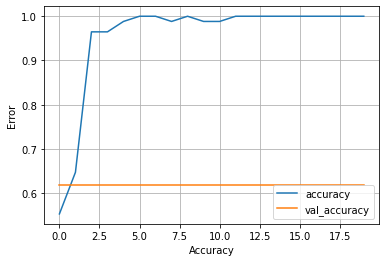

In [ ]:
plot_history(history)

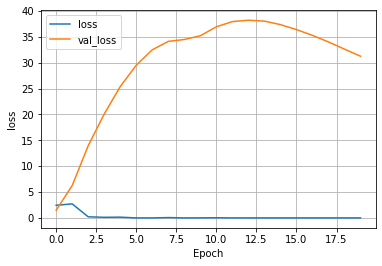

In [ ]:
plot_loss(history)